# Project 1: Titanic - Machine Learning from Disaster

### Brief Project Description

In this project, the objective is to build a machine learning model using data from the Titanic disaster to predict "what sorts of people were more likely to survive." The project will utilize passenger data, including variables such as name, age, gender, socio-economic class, and more.

### Variables of the Dataset

The dataset used in the project contains the following variables, along with their respective definitions:

   * **survival - Survival (0 = No, 1 = Yes)**
   * **pclass -  	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)**
   * **sex - Sex**
   * **Age - Age in years**
   * **sibsp - # of siblings / spouses aboard the Titanic**
   * **parch - # of parents / children aboard the Titanic**
   * **ticket - Ticket number**
   * **fare - Passenger fare**
   * **cabin - Cabin number**
   * **embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)**

The dataset and a detailed description of the variables can be found at the following URL: https://www.kaggle.com/competitions/titanic/data

### Data Import and first Inspection

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

In [122]:
import warnings
warnings.filterwarnings("ignore")

In [123]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [124]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [128]:
X_train['Survived'].unique()

array([0, 1])

In [129]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Check dataframe for duplicates__

The first thing we would like to do is to check the dataframe for duplicate rows.

In [130]:
X_train.duplicated().sum()

0

As we see, there are no duplicates at all.

## Explanatory Data Analysis

### Relationship between Gender and Survival

We have 342 survivors out of 891 passengers.

In [131]:
len(X_train[X_train['Survived']==1])

342

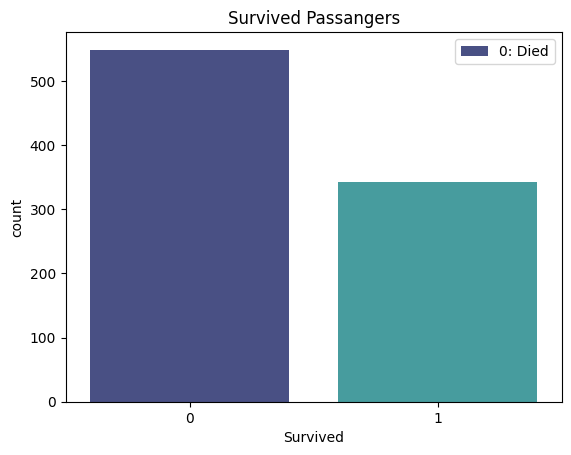

In [132]:
sns.countplot(x='Survived', data= X_train, palette='mako')
plt.title('Survived Passangers')

plt.legend(['0: Died', '1: Survived'], loc='upper right');

Furthermore, we want to determine the proportion of male and female passengers. By understanding the distribution of male and female passengers, we can also address the question of how many passengers have survived for each gender.

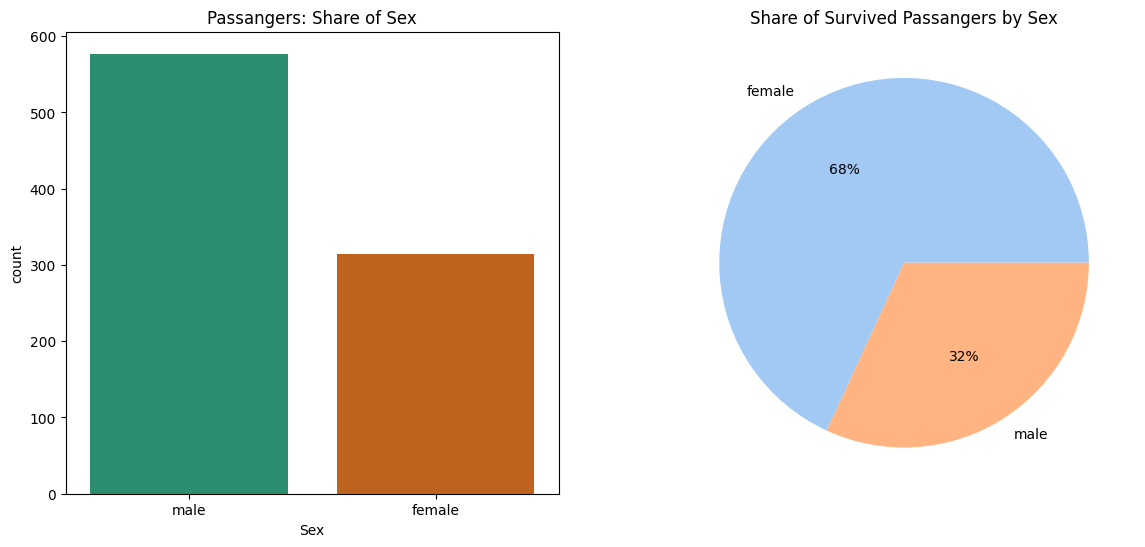

In [133]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Sex', data=X_train, palette='Dark2')
plt.title('Passangers: Share of Sex')

plt.subplot(1,2,2)
ser1 = X_train.groupby('Sex')['Survived'].sum()
colors = sns.color_palette('pastel')[0:5]
plt.pie(ser1.values, labels=ser1.index, colors = colors,autopct='%1.0f%%')
plt.title('Share of Survived Passangers by Sex');

In [134]:
X_train.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

As the data suggests, women, although they are the smaller passenger group in total, have a higher chance to survive the Titanic disaster comparing to men.

### Relationship between Economic Status and Survival

Another possible precondition for surviving might be the economic status of a passenger. 

__Relationship between Pclass and Survival__

An indicator that allows conclusions to the economic status of a passenger might be the Pclass. That's why, we examine the relationship between the Variables Pclass and Survived.

They are distributed as follows:

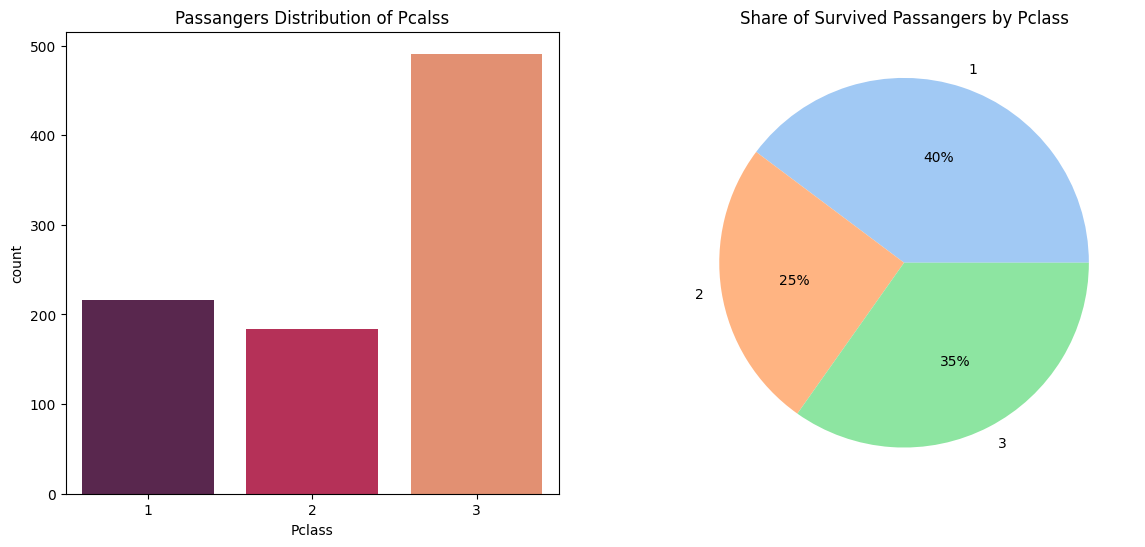

In [135]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='Pclass', data= X_train, palette="rocket")
plt.title('Passangers Distribution of Pcalss')


plt.subplot(1,2,2)
ser2 = X_train.groupby('Pclass')['Survived'].sum()
colors = sns.color_palette('pastel')[0:5]
plt.pie(ser2.values, labels=ser2.index, colors = colors,autopct='%1.0f%%')
plt.title('Share of Survived Passangers by Pclass');

We will also take a look at the number of survival values distributed among the three classes.

In [136]:
X_train.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

As we can see in this figure, there seems to be a connection between the features Pcall and Survived. A higher economic status expressed by the class increases the probability to survive. We later also investigate the correlation between those variables.

__Relationship between Fare and Survival__

Another variable that might indicate the economic status is the fare variable. Since we handle with a continuous variable, we are plotting out its distribution by box plot and violin plot. Those plots may also give us some hinds, whether we have to deal with outliers.

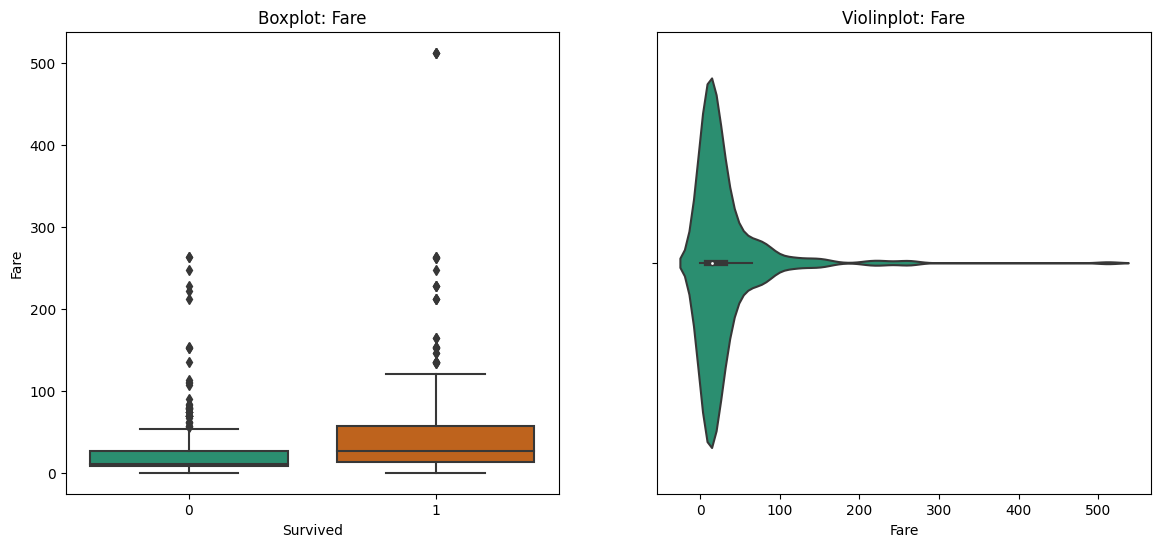

In [137]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(data=X_train, x='Survived', y='Fare',palette='Dark2' )
plt.title('Boxplot: Fare')


plt.subplot(1,2,2)
sns.violinplot(data=X_train, x='Fare', hue='Survived', palette='Dark2')
plt.title('Violinplot: Fare');

As a result, we can see that the fare price variable is linked to the survived variable in the way that a higher fare price increases the probability to survive. We further try to investigate this relationship by creating a density plot.

In [138]:
x1 = X_train[X_train['Survived']==1]['Fare'].dropna().to_numpy()
x2 = X_train[X_train['Survived']==0]['Fare'].dropna().to_numpy()

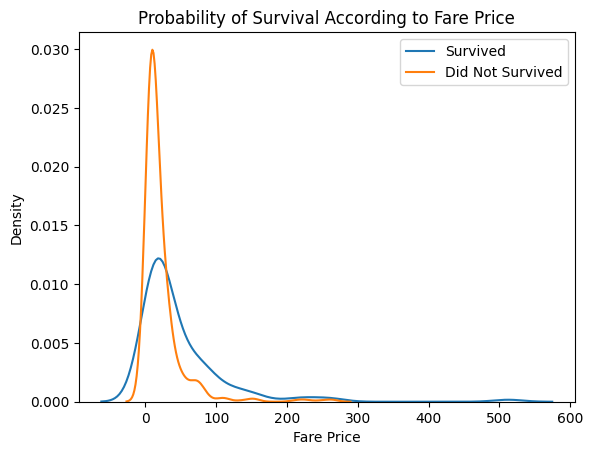

In [139]:
sns.kdeplot(x1, label='Survived')
sns.kdeplot(x2, label='Did Not Survived')
plt.legend()
plt.xlabel('Fare Price')
plt.title('Probability of Survival According to Fare Price');

Now, we compare the means between the Fare of those people who survived and those who did not survive.

In [140]:
x1.mean(), x2.mean()

(48.39540760233918, 22.117886885245902)

The comparison of the means shows that passengers who paid more for their fare are more likely to survive. However, there is a critical aspect in that consideration: There is uncertainty about the question whether the difference between means is statistically significant.

__Conduct a Z-Test__

To figure out if the difference between the mean values is indeed statistically significant, we conduct a z-test.

In [141]:
alpha = 0.5

stat, p = ztest(x1,x2)

print('Statistics=%.5f, p=%.5f' % (stat, p))

if p > alpha:
    print('x1_mean => x2_mean (fail to reject H0)')
else:
    print('x1_mean < x2_mean (reject H0)')

Statistics=7.93919, p=0.00000
x1_mean < x2_mean (reject H0)


Since the null hypothesis was rejected, indicating that there is a significant difference between the mean values being compared. 

### Distribution of Age

We would probably assume that a younger person, due to their better fitness and health, has better chances of surviving. That's why we shed light on the distribution of the variable age and examine how this variable is linked to the variable 'survived.'

__Distribution of the Age Variable__

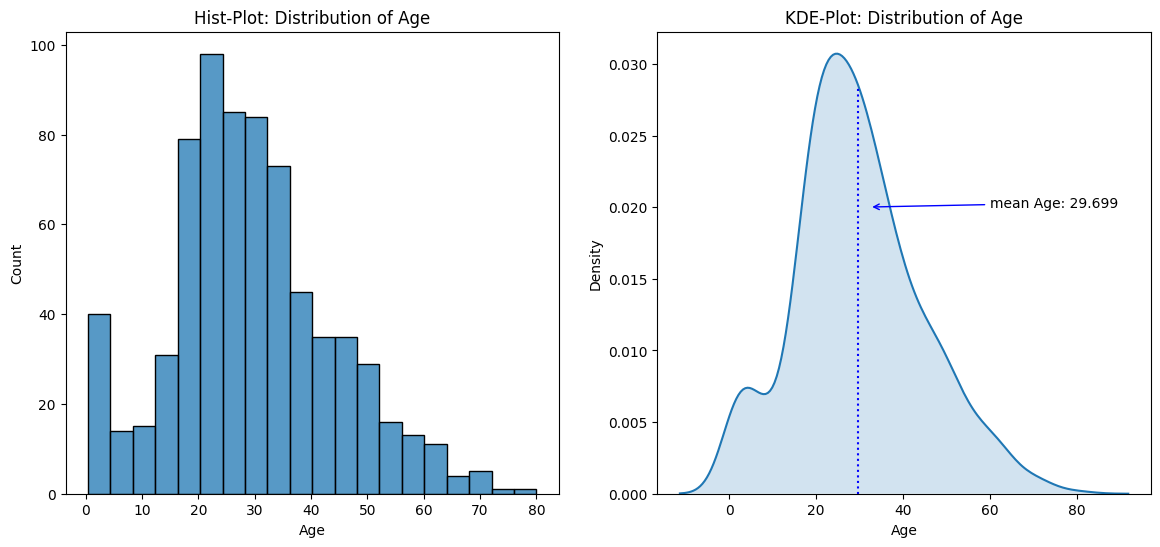

In [142]:
plt.figure(figsize=(14,6))

#Create a hist-plot
plt.subplot(1,2,1)
sns.histplot(data=X_train, x='Age')
plt.title('Hist-Plot: Distribution of Age')

#Create a kde-Plot
plt.subplot(1,2,2)
ax = sns.kdeplot(data=X_train, x='Age')

#Get the x,y coordinates and the mean value
kdeline = ax.lines[0]

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()


mean = X_train["Age"].mean()

# Calculate the hight of the kde plot at the mean 
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color="blue", ls=':') 
ax.fill_between(xs, 0, ys, alpha=0.2) 
plt.xlabel('Age')
plt.title('KDE-Plot: Distribution of Age');

# Annotate the kde-plot  
plt.annotate(
    'mean Age: ' + str(np.round(X_train["Age"].mean(),decimals=3)),
    xy=(X_train["Age"].mean(), 0.02),
    xytext=(60, 0.02),
    arrowprops=dict(arrowstyle='->', color='blue', shrinkB=10));

__Relationship between Age and Survived__

In [143]:
# Create a Age Group Flag

def age_group_flag(age):
    if age <=10:
        return "0-10 years"
    elif (age >10) and (age <=20):
        return "10-20 years"
    elif (age >20) and (age <=30):
        return "20-30 year"
    elif (age >30) and (age <=40):
        return "30-40 years"
    elif (age >40) and (age <=50):
        return "40-50 years"
    elif (age >50) and (age <=60):
        return "50-60 years"
    elif (age >60) and (age <=70):
        return "60-70 years"
    elif (age >70) and (age <=80):
        return "70-80 years"
    
X_train['Age_Group'] = X_train['Age'].apply(age_group_flag)
   

In [144]:
X_train.loc[X_train['Survived']==1].groupby('Age_Group')['Age_Group'].count()

Age_Group
0-10 years     38
10-20 years    44
20-30 year     84
30-40 years    69
40-50 years    33
50-60 years    17
60-70 years     4
70-80 years     1
Name: Age_Group, dtype: int64

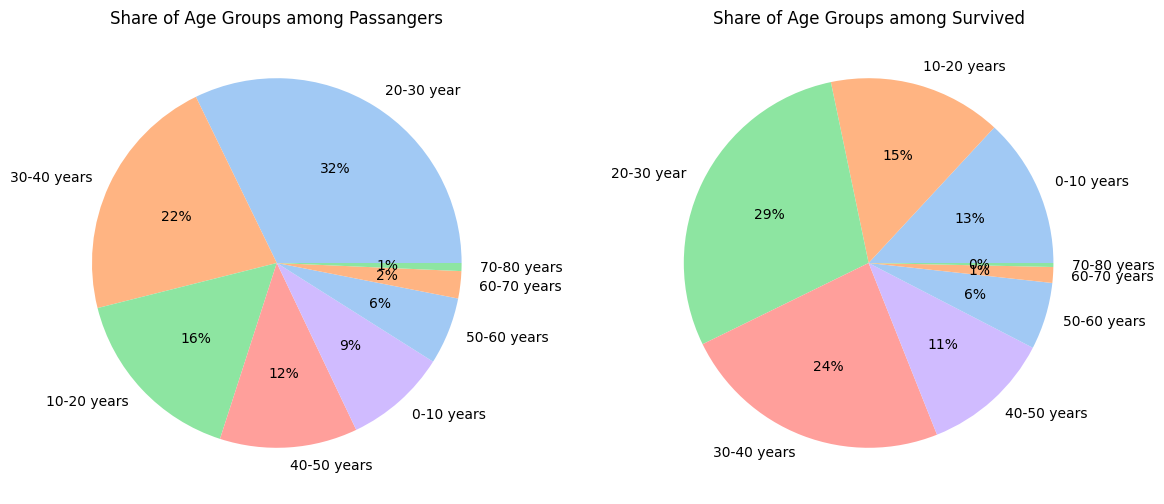

In [145]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
ser2 = X_train['Age_Group'].value_counts()
colors = sns.color_palette('pastel')[0:5]
plt.pie(ser2.values, labels=ser2.index, colors = colors,autopct='%1.0f%%')
plt.title('Share of Age Groups among Passangers')


plt.subplot(1,2,2)
ser3 = X_train.loc[X_train['Survived']==1].groupby('Age_Group')['Age_Group'].count()
colors = sns.color_palette('pastel')[0:5]
plt.pie(ser3.values, labels=ser3.index, colors = colors,autopct='%1.0f%%')
plt.title('Share of Age Groups among Survived');

We needed the distinction in age groups just for the purpose of pointing out the relationship between the variables survival and age. That's why, we drop the age group column now, because it didn't affect our further going investigation

In [146]:
X_train.drop('Age_Group', axis=1, inplace=True)

## Feature Engineering

Get an overview of the non-numeric columns.

In [147]:
X_train.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


Now, let's look if we can get rid of some columns, that have no impact on our further going investigation.

__Drop the Cabin Column__

In [148]:
X_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Since we only know the cabin for 204 passengers of overall 891 passengers, we decide to do not take this feature into consideration. So we drop this column.

In [149]:
X_train.drop('Cabin', axis=1, inplace=True)
X_test.drop('Cabin', axis=1, inplace=True)

__Drop the Ticket Column__

In [150]:
X_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [151]:
X_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Since we have 681 different ticket numbers and 7 is the greatest value of a ticket number, passengers 
have in common, we decide to left out that feature in our further investigation.

In [152]:
X_train.drop('Ticket', axis=1, inplace=True)
X_test.drop('Ticket', axis=1, inplace=True)

__Drop the Name Column__

The identification of the passengers is well-defined by their ID. For that reason, we drop the name column.

In [153]:
X_train.drop('Name', axis=1, inplace=True)
X_test.drop('Name', axis=1, inplace=True)

In [154]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [155]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


__Filling Missing Values in the Age Column__

If we take a look at the modified data frame final_X_train, we see that the column age contains some missing values. Our way to deal with that problem, is to fill the missing age values with the mean age.

In [156]:
mean = X_train['Age'].mean()
mean_test = X_test['Age'].mean()

In [157]:
mean 

29.69911764705882

In [158]:
mean_test

30.272590361445783

In [159]:
X_train['Age'] = X_train['Age'].fillna(mean)
X_test['Age'] = X_test['Age'].fillna(mean)

In [160]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [161]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


For the dataframe X_train, we still have two missing values in the embarked column. In this case, we drop off that rows with that missing values.

In [162]:
X_train.dropna(axis=0, inplace=True)

Similarly the dataframe X_test has one missing value in the fare column. We drop that row that contain the missing value.

In [163]:
X_test.dropna(axis=0, inplace=True)

__Create Dummy Variables for the Non-Numeric Columns__

In [164]:
X_train_dummies = pd.get_dummies(X_train[['Sex', 'Embarked']])
X_test_dummies = pd.get_dummies(X_test[['Sex', 'Embarked']])

In [165]:
X_train_object = X_train.select_dtypes(include='object')
X_test_object = X_test.select_dtypes(include='object')

In [166]:
X_train_numeric = X_train.select_dtypes(exclude='object')
X_test_numeric = X_test.select_dtypes(exclude='object')

In [167]:
X_train_object_dummies = pd.get_dummies(X_train_object,drop_first=True)
X_test_object_dummies = pd.get_dummies(X_test_object, drop_first=True)

In [168]:
X_train_object_dummies 

,Sex_male,Embarked_Q,Embarked_S
0,True,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,True,False,True
...,...,...,...
886,True,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [169]:
final_X_train= pd.concat([X_train_object_dummies, X_train_numeric], axis=1)
final_X_test= pd.concat([X_test_object_dummies, X_test_numeric], axis=1)

In [170]:
final_X_train 

,Sex_male,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,True,False,True,1,0,3,22.000000,1,0,7.2500
1,False,False,False,2,1,1,38.000000,1,0,71.2833
2,False,False,True,3,1,3,26.000000,0,0,7.9250
3,False,False,True,4,1,1,35.000000,1,0,53.1000
4,True,False,True,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,True,False,True,887,0,2,27.000000,0,0,13.0000
887,False,False,True,888,1,1,19.000000,0,0,30.0000
888,False,False,True,889,0,3,29.699118,1,2,23.4500
889,True,False,False,890,1,1,26.000000,0,0,30.0000


In [171]:
final_X_test

,Sex_male,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,True,True,False,892,3,34.500000,0,0,7.8292
1,False,False,True,893,3,47.000000,1,0,7.0000
2,True,True,False,894,2,62.000000,0,0,9.6875
3,True,False,True,895,3,27.000000,0,0,8.6625
4,False,False,True,896,3,22.000000,1,1,12.2875
...,...,...,...,...,...,...,...,...,...
413,True,False,True,1305,3,29.699118,0,0,8.0500
414,False,False,False,1306,1,39.000000,0,0,108.9000
415,True,False,True,1307,3,38.500000,0,0,7.2500
416,True,False,True,1308,3,29.699118,0,0,8.0500


In [172]:
final_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex_male     889 non-null    bool   
 1   Embarked_Q   889 non-null    bool   
 2   Embarked_S   889 non-null    bool   
 3   PassengerId  889 non-null    int64  
 4   Survived     889 non-null    int64  
 5   Pclass       889 non-null    int64  
 6   Age          889 non-null    float64
 7   SibSp        889 non-null    int64  
 8   Parch        889 non-null    int64  
 9   Fare         889 non-null    float64
dtypes: bool(3), float64(2), int64(5)
memory usage: 58.2 KB


In [173]:
final_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex_male     417 non-null    bool   
 1   Embarked_Q   417 non-null    bool   
 2   Embarked_S   417 non-null    bool   
 3   PassengerId  417 non-null    int64  
 4   Pclass       417 non-null    int64  
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Fare         417 non-null    float64
dtypes: bool(3), float64(2), int64(4)
memory usage: 24.0 KB


__Correlation between Features__

Now, we would like to take a look how the features (variables) are correlated to each other.

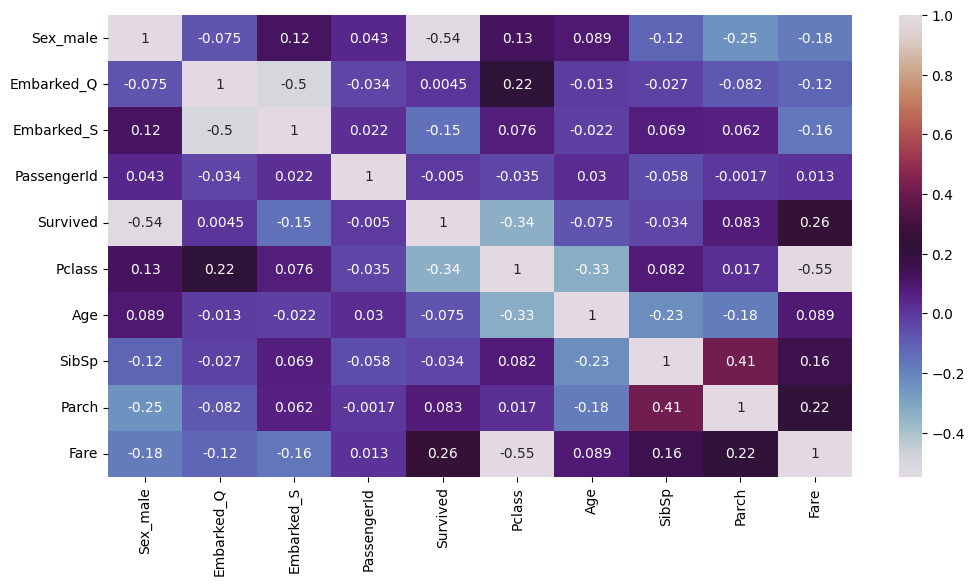

In [174]:
plt.figure(figsize=(12,6))
sns.heatmap(final_X_train.corr(), annot=True, cmap='twilight');

Our main interest lies on the column survived, so we highlight the absolut correlation of each feature to that column.

In [175]:
final_X_train.corr()['Survived'].abs().sort_values(ascending=False)[1:]

Sex_male       0.541585
Pclass         0.335549
Fare           0.255290
Embarked_S     0.151777
Parch          0.083151
Age            0.074673
SibSp          0.034040
PassengerId    0.005028
Embarked_Q     0.004536
Name: Survived, dtype: float64

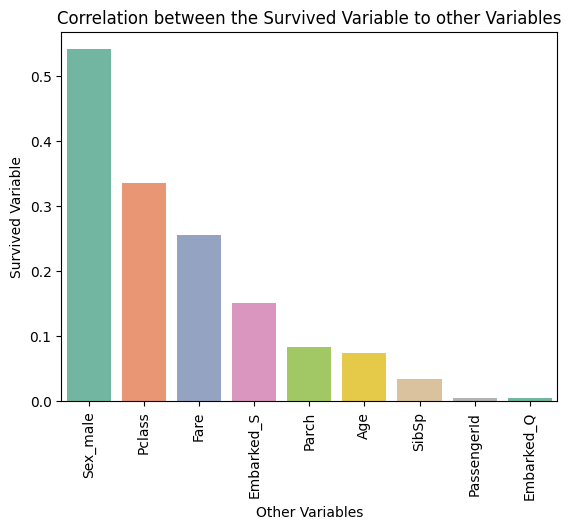

In [176]:
corr_surv = final_X_train.corr()['Survived'].abs().sort_values(ascending=False)[1:]

sns.barplot(x=corr_surv.index, y=corr_surv, palette="Set2")
plt.xlabel('Other Variables')
plt.ylabel('Survived Variable')
plt.title('Correlation between the Survived Variable to other Variables')
plt.xticks(rotation=90);

As we can see, the features __Sex_male__, __Pclass__  and __Fare__ seem to have the largest linear influence on the survival of a passenger.

## Train | Test Split and Scaling

In this section, we make a train-test split and scale our data.

__Train Test Split and Scaling for the final_X_train Dataframe__

In [177]:
X = final_X_train.drop('Survived', axis=1)

In [178]:
y = final_X_train['Survived']

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
scaler= StandardScaler()

In [183]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

__Scaling for the final_X_test Dataframe__

In [184]:
scaled_test_data = scaler.transform(final_X_test)

## Build Machine Learning Models

In this section, we test different machine learning models against each other to figure out, which one is the most suitable one to predict the survival of a passenger.

To avoid the duplication of similar code, we define the eval_model function.

In [185]:
def eval_model(y_test, y_predictions):
    
    #Print the accuracy score
    print('Accuracy Score: ', accuracy_score(y_test, y_predictions))
    
    #Calculate the confusion matrix
    cm = confusion_matrix(y_test,y_predictions)
    
    #Print the confusion matrix
    print('                    ')
    print('Confusion Matrix')
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    
    #Print the classification report
    print('                    ')
    print('Classification Report')
    print('                    ')
    print(classification_report(y_test, y_predictions))

We create model_results, a list of dictionaries, where each dictionary represents a machine learning model and contains the model results. 

In [186]:
model_results= []

### Multi Class Logistic Regression

In this approach we choose __Multi Class Logistic Regression__, to create our __Machine Learning Model__.

First, we build a multi class logistic regression model by using a grid search for the best parameters.

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
log_reg_model = LogisticRegression(solver='saga', max_iter=5000)

In [190]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C }

In [191]:
grid_model = GridSearchCV(log_reg_model, param_grid=param_grid)

In [192]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [193]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'elasticnet'}

In [194]:
y_pred = grid_model.predict(scaled_X_test)

In [195]:
lrg_model = dict()
lrg_model['lr_model'] = [y_pred,y_test]

model_results.append(lrg_model)

In [196]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0])

__Evaluate our Model__

Next, we evaluate our created model on certain metrics.

In [197]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Accuracy Score:  0.8089887640449438
                    
Confusion Matrix


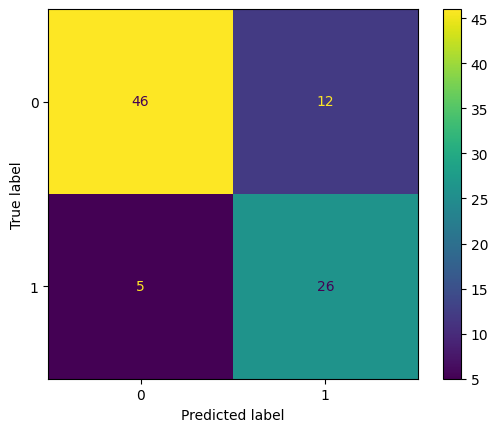

                    
Classification Report
                    
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        58
           1       0.68      0.84      0.75        31

    accuracy                           0.81        89
   macro avg       0.79      0.82      0.80        89
weighted avg       0.83      0.81      0.81        89



In [198]:
eval_model(y_test, y_pred)

__Prediction for the Test Data using the Multi Class Logistic Regression Model__

In [199]:
y_pred = grid_model.predict(scaled_test_data)

In [200]:
np.unique(y_pred, return_counts=True)[1]

array([252, 165])

In [201]:
pd.DataFrame([np.unique(y_pred, return_counts=True)[1]],columns=['Died', 'Survived'], index= ['Number'])

,Died,Survived
Number,252,165


As an outcome, we have number 252 passengers that died during the disaster and 165 passengers that survived the disaster.

### Support Vector Machine Model

Second, we build a support vector machine classifier to predict the survivals of passengers.

In [202]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [203]:
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm, param_grid)

In [204]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [205]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [206]:
y_pred = grid.predict(scaled_X_test)

In [207]:
svm_model = dict()
svm_model['svm_model'] = [y_pred,y_test]

model_results.append(svm_model)

__Evaluate our Model__

Accuracy Score:  0.8202247191011236
                    
Confusion Matrix


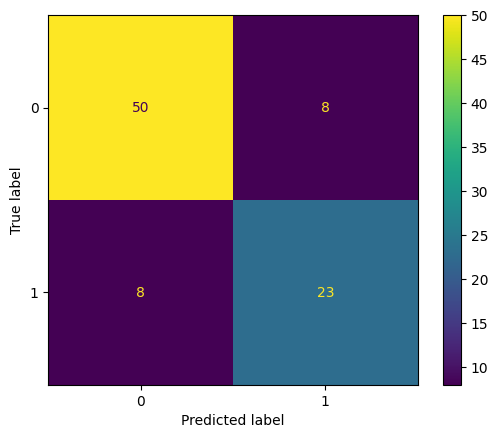

                    
Classification Report
                    
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.74      0.74      0.74        31

    accuracy                           0.82        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.82      0.82      0.82        89



In [208]:
eval_model(y_test, y_pred)

__Prediction for the Test Data using the SVC model__

In [209]:
y_pred = grid_model.predict(scaled_test_data)

In [210]:
np.unique(y_pred, return_counts=True)[1]

array([252, 165])

In [211]:
pd.DataFrame([np.unique(y_pred, return_counts=True)[1]],columns=['Died', 'Survived'], index= ['Number'])

,Died,Survived
Number,252,165


### Random Forest Model

Third, we build a random forest classifier model to predict the survivals of passengers.

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
test_error = []

for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=1)
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1 - accuracy_score(y_test, test_preds))

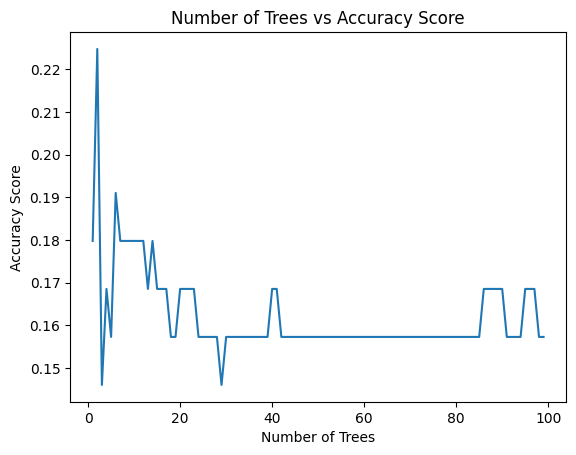

In [214]:
plt.plot(range(1,100), test_error, label='Test_Error')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.title('Number of Trees vs Accuracy Score');

In [215]:
pd.Series(test_error, range(1,100)).idxmin()

3

In [216]:
rfc_model = RandomForestClassifier(n_estimators= pd.Series(test_error, range(1,100)).idxmin(), 
                                   max_depth=5, random_state=1)
rfc_model.fit(X_train, y_train)
y_preds = rfc_model.predict(X_test)

In [217]:
rf_model = dict()
rf_model['rf_model'] = [y_preds,y_test]

model_results.append(rf_model)

__Evaluate our model__

Accuracy Score:  0.8539325842696629
                    
Confusion Matrix


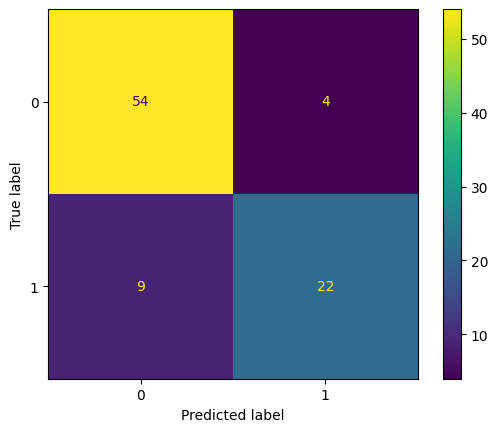

                    
Classification Report
                    
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.85      0.71      0.77        31

    accuracy                           0.85        89
   macro avg       0.85      0.82      0.83        89
weighted avg       0.85      0.85      0.85        89



In [218]:
eval_model(y_test, y_preds)

### Ada Boost Classifier Model

Fourth, we build an ada boost classifier model to predict the survivals of passengers.

In [219]:
from sklearn.ensemble import AdaBoostClassifier

In [220]:
error_rates = []

for n in range(1,96):
    ada_boost_model = AdaBoostClassifier(n_estimators=n)
    ada_boost_model.fit(X_train, y_train)
    y_preds = ada_boost_model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_preds)
    error_rates.append(err)

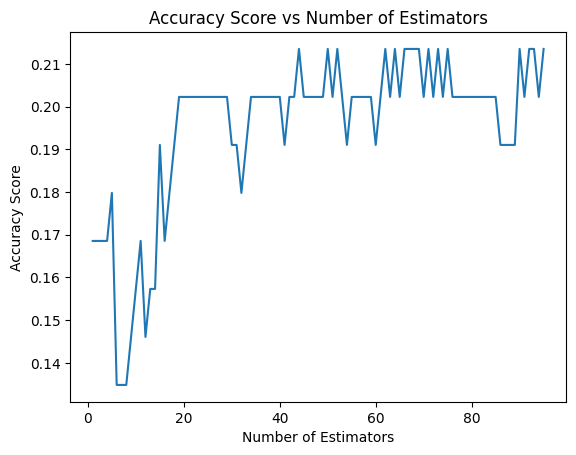

In [221]:
plt.plot(range(1,96),error_rates)
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Estimators')
plt.title('Accuracy Score vs Number of Estimators');

In [222]:
pd.Series(error_rates, range(1,96)).idxmin()

6

In [223]:
ada_boost_model = AdaBoostClassifier(n_estimators=pd.Series(error_rates, range(1,96)).idxmin())
ada_boost_model.fit(X_train, y_train)
y_preds = ada_boost_model.predict(X_test)

In [224]:
ada_boost_model = dict()
ada_boost_model['ada_boost_model'] = [y_preds,y_test]

model_results.append(ada_boost_model)

Accuracy Score:  0.8651685393258427
                    
Confusion Matrix


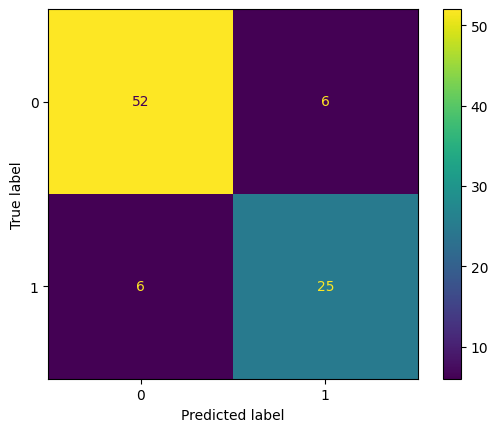

                    
Classification Report
                    
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.81      0.81      0.81        31

    accuracy                           0.87        89
   macro avg       0.85      0.85      0.85        89
weighted avg       0.87      0.87      0.87        89



In [225]:
eval_model(y_test, y_preds)

## Comparing Models Performance

In this section, we want to compare the performance of the different models we have created. 

We define a function to store the results we received by creating and testing the different machine learning models in the previous section.

In [226]:
def relevat_metric_scores(model_name, y_test, y_preds):
    
    # Store precision scores

    precision_for_0.append(pd.DataFrame(classification_report(y_test, y_preds,output_dict=True)).iloc[0]["0"])
    precision_for_1.append(pd.DataFrame(classification_report(y_test, y_preds,output_dict=True)).iloc[1]["0"])

    # Store recall scores

    recall_for_0.append(pd.DataFrame(classification_report(y_test, y_preds,output_dict=True)).iloc[0]["1"])
    recall_for_1.append(pd.DataFrame(classification_report(y_test, y_preds,output_dict=True)).iloc[1]["1"])

    # Store accuracy scores
    accuracy.append(pd.DataFrame(classification_report(y_test, y_preds,output_dict=True)).iloc[0]["accuracy"]) 
    
    # Store model name
    model.append(model_name)


In [227]:
# Create some lists where we store the results regarding the metrics we have used.

precision_for_0 = []
precision_for_1 = []

recall_for_0 = []
recall_for_1 = []

accuracy = []
    
model = []

# Store the metric results of each model in the right list.

for dic in model_results:
    for i in dic:
        relevat_metric_scores(i, dic[i][0],dic[i][1]) 
    
# Create a dataframe that contains the results for all models.

metric_scores = pd.DataFrame({'accuracy': accuracy, 'precision_for_0': precision_for_0, 'precision_for_1': precision_for_1, 
                              'recall_for_0': recall_for_0,'recall_for_1': recall_for_1, 
                              'model': model})

The following dataframe contains the results for all models.

In [228]:
metric_scores['total_score'] = metric_scores.sum(axis=1, numeric_only=True)

cols = ["accuracy", "precision_for_0", "precision_for_1", "recall_for_0", 
                 "recall_for_1", "total_score", "model"]

metric_scores = metric_scores[cols]

In [229]:
metric_scores

,accuracy,precision_for_0,precision_for_1,recall_for_0,recall_for_1,total_score,model
0,0.808989,0.793103,0.901961,0.838710,0.684211,4.026973,lr_model
1,0.820225,0.862069,0.862069,0.741935,0.741935,4.028234,svm_model
2,0.853933,0.931034,0.857143,0.709677,0.846154,4.197941,rf_model
3,0.865169,0.896552,0.896552,0.806452,0.806452,4.271175,ada_boost_model


Now, let's plot out our results, so that they are easier to compare. First, we plot out results for each model and for each metric. That gives us an overview, how good a model performs on a certain metric.

In [230]:
df_new = pd.melt(metric_scores.drop('total_score', axis=1), 
                 id_vars="model", var_name="metrics", value_name="score")

<Figure size 1000x400 with 0 Axes>

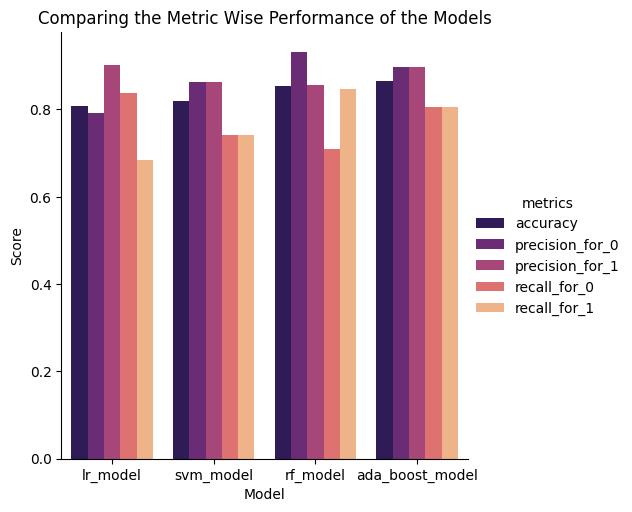

In [231]:
plt.figure(figsize=(10,4))

sns.catplot(x="model", y="score", hue="metrics", data=df_new , kind='bar', palette='magma')
plt.title("Comparing the Metric Wise Performance of the Models")
plt.xlabel("Model")
plt.ylabel("Score");

Among the models we want to single out the model, which has the best performance in total. By performance in total, we mean the sum of all metric scores.

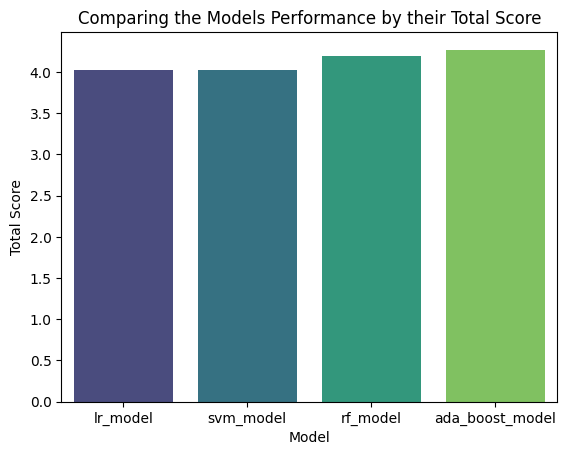

In [232]:
sns.barplot(data=metric_scores, x='model', y='total_score', palette='viridis')
plt.xlabel('Model')
plt.ylabel('Total Score')
plt.title('Comparing the Models Performance by their Total Score');

# Conclusions

How to deal with the obtained results? The answer to that question depends on our intentions and what we would like to predict. Overall, we can see that the AdaBoost model provides the strongest results. However, while some models excel in predicting specific outputs, others might be better suited for different tasks. For instance, logistic regression does the best job among all models in predicting the survival of a passenger. However, this improvement in accuracy is accompanied by the highest misclassification rates for other instances.

# References

https://www.udemy.com/course/bayesian-machine-learning-in-python-ab-testing/